# Main Modelling Notebook

In [1]:
import itertools as it
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd
import re
import scipy as sp
import sklearn.preprocessing as Preprocessing
import datetime

from itertools import combinations
from sklearn.cross_validation import KFold as kfold
from sklearn.decomposition import TruncatedSVD as tSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from scipy.io import mmread

%matplotlib inline
plt.style.use('ggplot') 
from IPython.display import display, HTML

#### Load Data

In [63]:
# load data
%run -i data_loading.py

173805
79052
Indexes computed
address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
employ_title object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
installment float64
ipr float64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
months_since_earliest_credit float64
Training set has 19719 rows
address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
employ_title object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
installment float64
ipr float64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
months_since_earliest_credit float64
Test set h

#### Set up Modelling Framework

In [68]:
# set up modelling framework
% run -i modelling_framework.py

#### Models without PCA

In [66]:
y.value_counts()

True     16672
False     3047
Name: loan_status, dtype: int64

In [67]:
y.mean()

0.8454789796642832

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


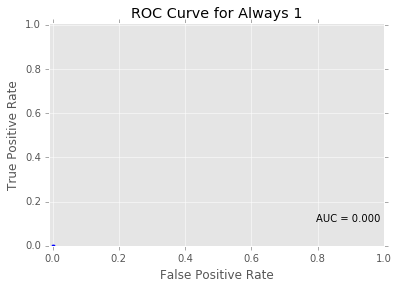

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.000  | test score 0.896  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [4]:
eval_model_by_year(lambda: DummyClassifier(strategy='constant', constant=0), model_name='Always 1')

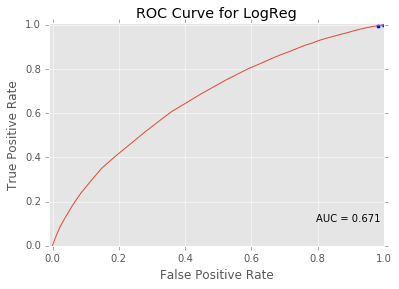

all   score: 0.845  baseline: 0.845   prec: 0.563   f1: 0.916  | test score 0.152  prec 0.546 f1 0.008  GP -624MM
2011  score: 0.885  baseline: 0.887   prec: nan   f1: 0.939  | test score 0.895  prec 0.636
2012  score: 0.867  baseline: 0.867   prec: 0.614   f1: 0.928  | test score 0.862  prec 0.714
2013  score: 0.816  baseline: 0.818   prec: 0.558   f1: 0.898  | test score 0.823  prec 0.554


In [69]:
eval_model_by_year(lambda: Log_Reg(), model_name='LogReg')

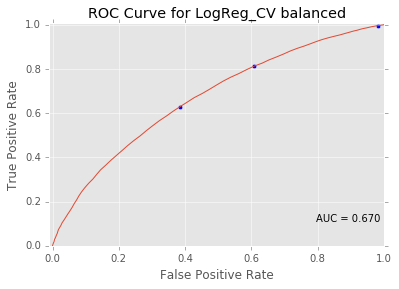

all   score: 0.636  baseline: 0.845   prec: 0.759   f1: 0.748  | test score 0.372  prec 0.771 f1 0.500  GP -50MM
2011  score: 0.627  baseline: 0.887   prec: 0.845   f1: 0.753  | test score 0.628  prec 0.850
2012  score: 0.628  baseline: 0.867   prec: 0.801   f1: 0.747  | test score 0.620  prec 0.808
2013  score: 0.641  baseline: 0.818   prec: 0.720   f1: 0.746  | test score 0.636  prec 0.734


In [70]:
eval_model_by_year(lambda: Log_Reg_CV(class_weight='balanced'), model_name='LogReg_CV balanced') # TODO: print C afterwards

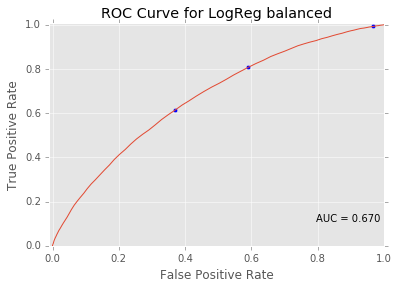

all   score: 0.635  baseline: 0.845   1-prec: 0.903   f1: 0.346  | test score 0.372  1-prec 0.901 f1 0.157  GP 264MM
2011  score: 0.629  baseline: 0.887   wscore: 0.912   f1: 0.239  | test score 0.626  1-prec 0.924
2012  score: 0.630  baseline: 0.867   wscore: 0.913   f1: 0.302  | test score 0.620  1-prec 0.898
2013  score: 0.640  baseline: 0.818   wscore: 0.884   f1: 0.385  | test score 0.634  1-prec 0.887


In [6]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), model_name='LogReg balanced')

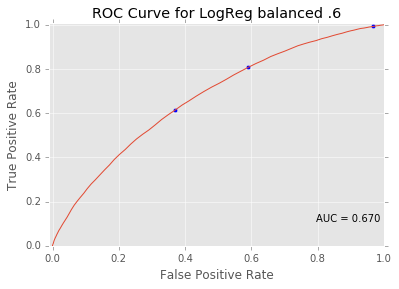

all   score: 0.635  baseline: 0.845   1-prec: 0.923   f1: 0.346  | test score 0.530  1-prec 0.923 f1 0.110  GP -27MM
2011  score: 0.629  baseline: 0.887   wscore: 0.918   f1: 0.239  | test score 0.626  1-prec 0.936
2012  score: 0.630  baseline: 0.867   wscore: 0.932   f1: 0.302  | test score 0.620  1-prec 0.917
2013  score: 0.640  baseline: 0.818   wscore: 0.907   f1: 0.385  | test score 0.634  1-prec 0.906


In [7]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, model_name='LogReg balanced .6')

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


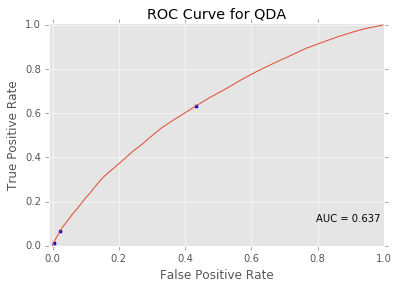

all   score: 0.844  baseline: 0.845   1-prec: 0.847   f1: 0.025  | test score 0.153  1-prec 0.850 f1 0.261  GP 842MM
2011  score: 0.878  baseline: 0.887   wscore: 0.889   f1: 0.069  | test score 0.883  1-prec 0.899
2012  score: 0.866  baseline: 0.867   wscore: 0.867   f1: 0.010  | test score 0.862  1-prec 0.864
2013  score: 0.812  baseline: 0.818   wscore: 0.823   f1: 0.089  | test score 0.818  1-prec 0.830


In [8]:
eval_model_by_year(lambda: QDA(reg_param = 1), model_name='QDA')

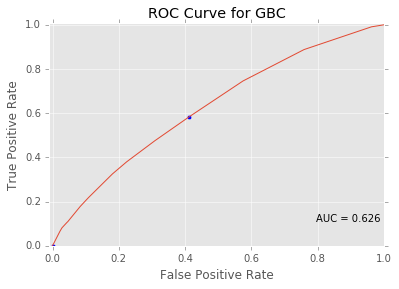

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.015  | test score 0.895  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [9]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), model_name='GBC')

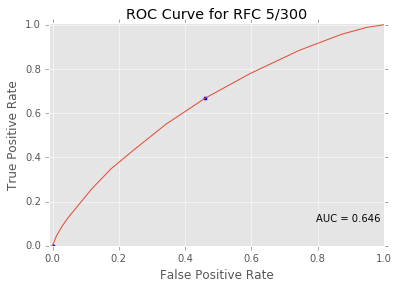

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.000  | test score 0.896  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [10]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300), model_name='RFC 5/300')

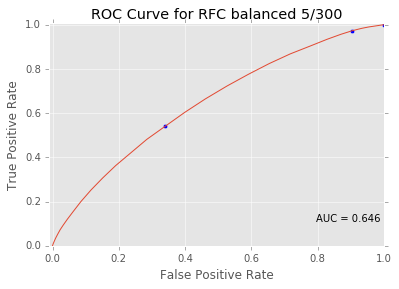

all   score: 0.650  baseline: 0.845   1-prec: 0.890   f1: 0.327  | test score 0.358  1-prec 0.889 f1 0.178  GP 321MM
2011  score: 0.774  baseline: 0.887   wscore: 0.901   f1: 0.217  | test score 0.779  1-prec 0.913
2012  score: 0.650  baseline: 0.867   wscore: 0.902   f1: 0.284  | test score 0.638  1-prec 0.886
2013  score: 0.659  baseline: 0.818   wscore: 0.871   f1: 0.366  | test score 0.664  1-prec 0.874


In [11]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, class_weight = 'balanced', n_estimators=300),
                   model_name='RFC balanced 5/300')

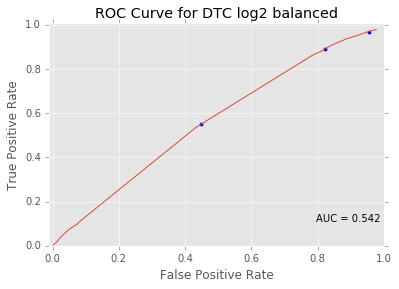

all   score: 0.598  baseline: 0.845   1-prec: 0.874   f1: 0.284  | test score 0.449  1-prec 0.873 f1 0.198  GP 211MM
2011  score: 0.611  baseline: 0.887   wscore: 0.896   f1: 0.200  | test score 0.505  1-prec 0.914
2012  score: 0.547  baseline: 0.867   wscore: 0.887   f1: 0.241  | test score 0.491  1-prec 0.891
2013  score: 0.598  baseline: 0.818   wscore: 0.858   f1: 0.329  | test score 0.588  1-prec 0.859


In [12]:
eval_model_by_year(lambda: DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                  model_name='DTC log2 balanced')

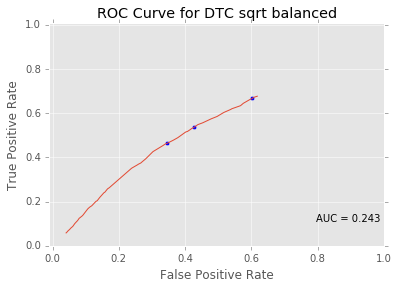

all   score: 0.634  baseline: 0.845   1-prec: 0.863   f1: 0.260  | test score 0.375  1-prec 0.872 f1 0.206  GP 361MM
2011  score: 0.737  baseline: 0.887   wscore: 0.889   f1: 0.158  | test score 0.725  1-prec 0.904
2012  score: 0.659  baseline: 0.867   wscore: 0.877   f1: 0.214  | test score 0.633  1-prec 0.871
2013  score: 0.630  baseline: 0.818   wscore: 0.838   f1: 0.285  | test score 0.642  1-prec 0.841


In [13]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC sqrt balanced')

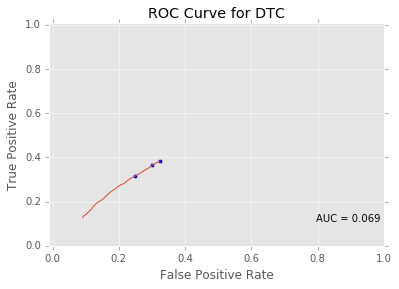

all   score: 0.679  baseline: 0.845   1-prec: 0.858   f1: 0.237  | test score 0.314  1-prec 0.860 f1 0.233  GP 501MM
2011  score: 0.768  baseline: 0.887   wscore: 0.890   f1: 0.152  | test score 0.770  1-prec 0.900
2012  score: 0.713  baseline: 0.867   wscore: 0.879   f1: 0.216  | test score 0.632  1-prec 0.875
2013  score: 0.681  baseline: 0.818   wscore: 0.835   f1: 0.268  | test score 0.691  1-prec 0.842


In [14]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = None, class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC')

In [15]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True))

In [16]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True), prob_threshold=0.85)

#### Other Models without PCA

In [17]:
# TODO: Try again, this time fitting a regression against the payments received

In [18]:
# Curious -- what are the 95 CI for the baselines?
for yr in set(years.values):
    yr_n = (years == yr).sum()
    yr_def = (y[years == yr]).sum()
    yr_p = (y[years == yr]).mean()
    yr_se = (yr_p * (1.0-yr_p) / yr_n)
    print "y=%4d   n=%4d   d=%4d   p: %.3f | %.3f | %.3f" % (yr, yr_n, yr_def, yr_p - 1.96*yr_se, yr_p, yr_p + 1.96*yr_se)

y=2011   n=2521   d= 286   p: 0.113 | 0.113 | 0.114
y=2012   n=7475   d= 994   p: 0.133 | 0.133 | 0.133
y=2013   n=9723   d=1767   p: 0.182 | 0.182 | 0.182


In [19]:
# Default rate for small business is higher, right?
print y.mean()
print y[x_expanded.loan_purpose__small_business == 1].mean()

0.154521020336
0.230563002681


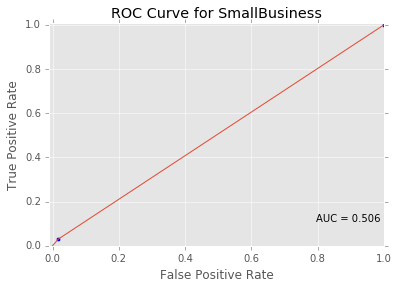

all   score: 0.835  baseline: 0.845   1-prec: 0.847   f1: 0.050  | test score 0.162  1-prec 0.850 f1 0.260  GP 819MM
2011  score: 0.714  baseline: 0.887   wscore: 0.856   f1: 0.070  | test score 0.874  1-prec 0.899
2012  score: 0.852  baseline: 0.867   wscore: 0.868   f1: 0.058  | test score 0.849  1-prec 0.865
2013  score: 0.816  baseline: 0.818   wscore: 0.820   f1: 0.042  | test score 0.821  1-prec 0.826


In [20]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), ['loan_purpose__small_business'], model_name='SmallBusiness')

In [21]:
# LogReg is doing well.. what are the largest coefficients?
lr = Log_Reg(class_weight='balanced').fit(x_expanded[years.isin([2011,2012,2013])], y[years.isin([2011,2012,2013])])
lr_coeff = pd.DataFrame(lr.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()

In [22]:
lr_coeff.sort_values('abs', ascending=False).coeff

loan_amount                                  -2.996568
installment                                   2.712334
employ_title__walmart                        -1.694660
employ_title__The_Home_Depot                 -1.433333
employ_title__United_Parcel_Service          -1.316579
employ_title__Time_Warner_Cable              -1.251917
employ_title__United_States_Postal_Service   -1.012053
employ_title__USPS                            0.999461
employ_title__US_Army                        -0.917707
employ_title__JP_Morgan_Chase                -0.906289
employ_title__State_of_California            -0.853006
employ_title__United_States_Air_Force        -0.845438
employ_title__Department_of_Defense          -0.840943
address_state__IA                             0.835219
employ_title__Home_Depot                      0.834280
employ_title__Driver                         -0.761986
employ_title__Chase                          -0.656704
loan_purpose__renewable_energy                0.635404
employ_tit

In [23]:
lr_probs = lr.predict_proba(x_expanded)[:,0]

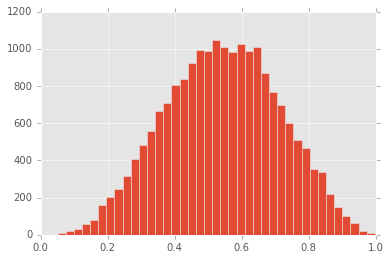

In [24]:
plt.hist(lr_probs ,bins=40)
plt.show()

In [25]:
1 - y.groupby([int(p*20)/20.0 for p in lr_probs]).mean()

0.00    0.333333
0.05    0.413793
0.10    0.546392
0.15    0.575875
0.20    0.624217
0.25    0.667925
0.30    0.699910
0.35    0.759134
0.40    0.807845
0.45    0.834000
0.50    0.855792
0.55    0.867769
0.60    0.904647
0.65    0.925330
0.70    0.941429
0.75    0.958824
0.80    0.966667
0.85    0.972222
0.90    0.957576
0.95    0.965517
Name: loan_status, dtype: float64

In [26]:
# probs = eval_model_with_threshold(lambda: Log_Reg())

In [27]:
# probs = eval_model_with_threshold(lambda: Log_Reg(class_weight='balanced'))

In [28]:
# VERY SLOW
#probs = eval_model_with_threshold(lambda: SVC(
#        random_state=1729,
#        probability=True))

#### Models with PCA

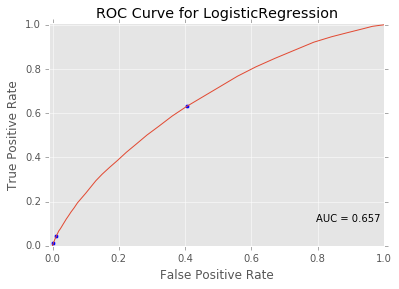

all   score: 0.845  baseline: 0.845   1-prec: 0.846   f1: 0.020  | test score 0.152  1-prec 0.849 f1 0.261  GP 846MM
2011  score: 0.885  baseline: 0.887   wscore: 0.888   f1: 0.025  | test score 0.895  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.008  | test score 0.863  1-prec 0.864
2013  score: 0.816  baseline: 0.818   wscore: 0.822   f1: 0.064  | test score 0.823  1-prec 0.829


In [29]:
eval_model_by_year(lambda: Log_Reg(), x = x_expanded_pca, x_test = x_test_expanded_pca)

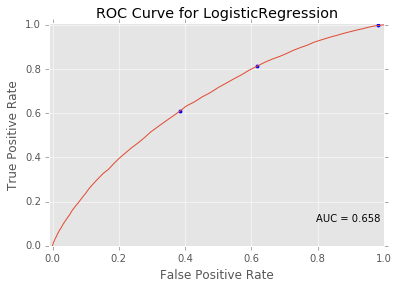

all   score: 0.625  baseline: 0.845   1-prec: 0.901   f1: 0.339  | test score 0.385  1-prec 0.898 f1 0.162  GP 250MM
2011  score: 0.622  baseline: 0.887   wscore: 0.911   f1: 0.236  | test score 0.615  1-prec 0.924
2012  score: 0.613  baseline: 0.867   wscore: 0.908   f1: 0.289  | test score 0.600  1-prec 0.898
2013  score: 0.635  baseline: 0.818   wscore: 0.881   f1: 0.379  | test score 0.627  1-prec 0.884


In [30]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), x = x_expanded_pca, x_test = x_test_expanded_pca)

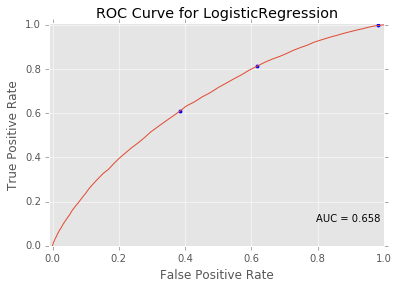

all   score: 0.625  baseline: 0.845   1-prec: 0.922   f1: 0.339  | test score 0.551  1-prec 0.920 f1 0.113  GP -79MM
2011  score: 0.622  baseline: 0.887   wscore: 0.923   f1: 0.236  | test score 0.615  1-prec 0.935
2012  score: 0.613  baseline: 0.867   wscore: 0.927   f1: 0.289  | test score 0.600  1-prec 0.915
2013  score: 0.635  baseline: 0.818   wscore: 0.906   f1: 0.379  | test score 0.627  1-prec 0.902


In [31]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, 
                   x = x_expanded_pca, x_test = x_test_expanded_pca)

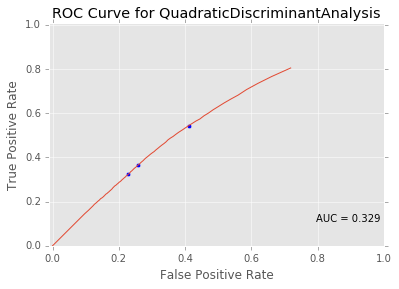

all   score: 0.699  baseline: 0.845   1-prec: 0.867   f1: 0.270  | test score 0.296  1-prec 0.864 f1 0.226  GP 517MM
2011  score: 0.681  baseline: 0.887   wscore: 0.898   f1: 0.200  | test score 0.728  1-prec 0.903
2012  score: 0.705  baseline: 0.867   wscore: 0.879   f1: 0.220  | test score 0.710  1-prec 0.874
2013  score: 0.699  baseline: 0.818   wscore: 0.840   f1: 0.283  | test score 0.681  1-prec 0.844


In [32]:
eval_model_by_year(lambda: QDA(), x = x_expanded_pca, x_test = x_test_expanded_pca)

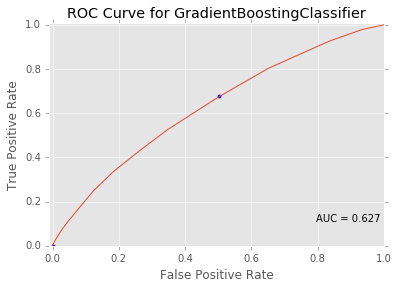

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.000  | test score 0.896  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [33]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                  x = x_expanded_pca, x_test = x_test_expanded_pca)

## NLP Modeling

#### Top Terms in Each Class

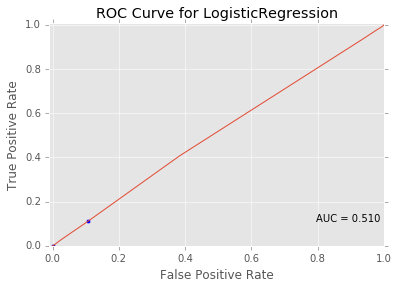

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [34]:
eval_model_by_year(lambda: Log_Reg(), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

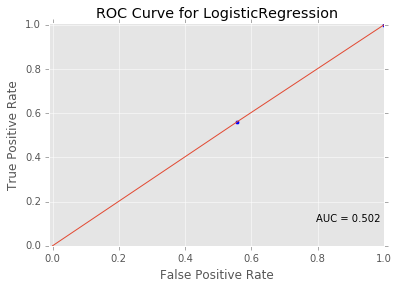

all   score: 0.465  baseline: 0.860   1-prec: 0.862   f1: 0.219  | test score 0.540  1-prec 0.859 f1 0.213  GP 2MM
2011  score: 0.739  baseline: 0.899   wscore: 0.896   f1: 0.110  | test score 0.849  1-prec 0.900
2012  score: 0.790  baseline: 0.865   wscore: 0.866   f1: 0.119  | test score 0.713  1-prec 0.864
2013  score: 0.244  baseline: 0.834   wscore: 0.824   f1: 0.274  | test score 0.464  1-prec 0.823


In [35]:
eval_model_by_year(lambda: Log_Reg(C = 10 ** -6, class_weight = 'balanced'), 
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

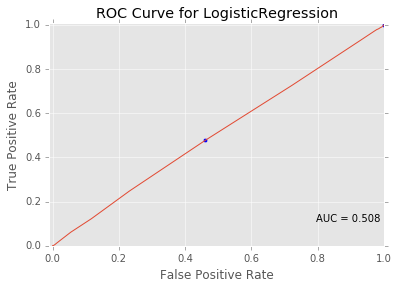

all   score: 0.558  baseline: 0.860   1-prec: nan   f1: 0.212  | test score 0.858  1-prec 0.818 f1 0.002  GP -159MM
2011  score: 0.555  baseline: 0.899   wscore: 0.905   f1: 0.158  | test score 0.550  1-prec 0.876
2012  score: 0.478  baseline: 0.865   wscore: 0.911   f1: 0.218  | test score 0.458  1-prec 0.837
2013  score: 0.534  baseline: 0.834   wscore: 0.847   f1: 0.233  | test score 0.471  1-prec 0.853


In [36]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), prob_threshold = 0.6,
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

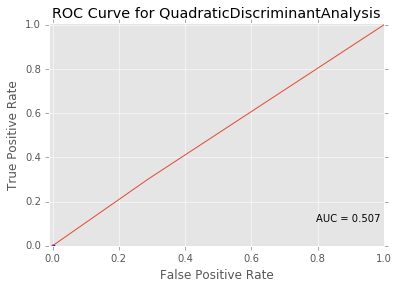

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [37]:
eval_model_by_year(lambda: QDA(reg_param = 1), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

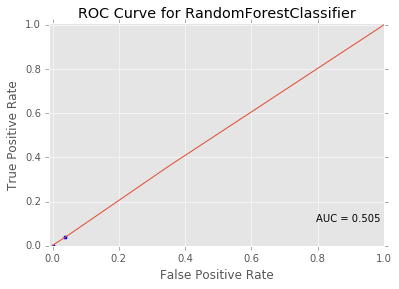

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [38]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

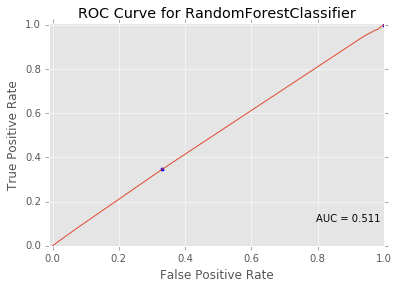

all   score: 0.627  baseline: 0.860   1-prec: 0.861   f1: 0.197  | test score 0.376  1-prec 0.861 f1 0.229  GP 85MM
2011  score: 0.713  baseline: 0.899   wscore: 0.897   f1: 0.130  | test score 0.729  1-prec 0.895
2012  score: 0.531  baseline: 0.865   wscore: 0.868   f1: 0.215  | test score 0.486  1-prec 0.861
2013  score: 0.636  baseline: 0.834   wscore: 0.833   f1: 0.206  | test score 0.551  1-prec 0.822


In [39]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300, class_weight = 'balanced'),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

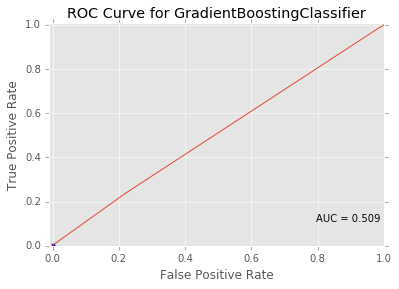

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [40]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

#### Full Document-Term Matrix (Reduced with PCA)

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\core\internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 59333 but corresponding boolean dimension is 14887
  return self.values[slicer]
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 59333 but corresponding boolean dimension is 14887
  result = getitem(key)


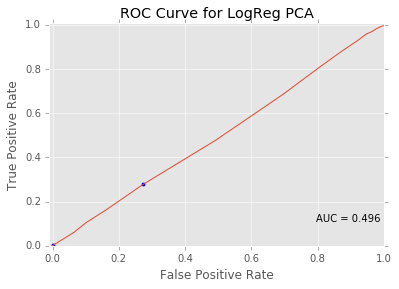

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.002  | test score 0.142  1-prec 0.858 f1 0.248  GP 216MM
2011  score: 0.894  baseline: 0.899   wscore: 0.898   f1: 0.005  | test score 0.893  1-prec 0.899
2012  score: 0.862  baseline: 0.865   wscore: 0.865   f1: 0.008  | test score 0.864  1-prec 0.866
2013  score: 0.832  baseline: 0.834   wscore: 0.834   f1: 0.001  | test score 0.826  1-prec 0.827


In [41]:
eval_model_by_year(lambda: Log_Reg(), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA')

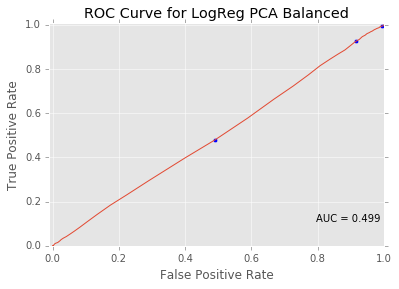

all   score: 0.509  baseline: 0.860   1-prec: 0.860   f1: 0.216  | test score 0.495  1-prec 0.856 f1 0.226  GP 31MM
2011  score: 0.616  baseline: 0.899   wscore: 0.903   f1: 0.169  | test score 0.574  1-prec 0.888
2012  score: 0.525  baseline: 0.865   wscore: 0.868   f1: 0.215  | test score 0.524  1-prec 0.864
2013  score: 0.524  baseline: 0.834   wscore: 0.833   f1: 0.242  | test score 0.519  1-prec 0.822


In [42]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA Balanced')

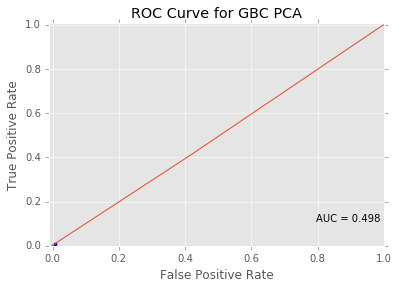

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 217MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.865  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [43]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                   x = desc_matrix_pca, x_test = desc_matrix_test_pca,
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='GBC PCA')

## Stacking

In [44]:
class Stacking(object):
    
    def __init__(self, unfitted_combiner, component_type = 'mixed'):
        self.combiner = unfitted_combiner
        self.model_stack = None   
        
        stack = []
        
        # logistic regression component models with various class weights
        if component_type == 'log_reg':
            for diff in np.arange(0, 5, 0.5):
                weight_dict = { 0 : 1, 1 : (1 + diff) }
                stack.append([Log_Reg(C = 1, class_weight = weight_dict), 'Log_Reg ' + str(1 + diff)])
                
        # default - mixed component models
        else:
            stack.append((Log_Reg(C = 10 ** -5), 'Log_Reg'))
            stack.append((Log_Reg(C = 10 ** -5, class_weight = 'balanced'), 'Log_Reg balanced'))
            stack.append((LDA(shrinkage = 1, solver = 'lsqr'), 'LDA'))
            stack.append((QDA(reg_param = 1), 'QDA'))
            stack.append((RFC(random_state=1729, n_estimators = 10, max_depth = 4), 'RF'))
            stack.append((RFC(random_state=1729, n_estimators = 300, max_depth = 5, class_weight = 'balanced'),
                        'RF balanced'))
            stack.append((GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), 'Boost'))
            stack.append((DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                        'Tree 1'))
            stack.append((DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                        'Tree 2'))
            stack.append((DTC(max_depth = 20, max_features = None, criterion = 'entropy'), 'Tree 3'))
            #stack.append(SVC(class_weight = 'balanced')) # slow
                         
        self.model_stack = pd.DataFrame(stack, columns = ['Model_Params', 'Model'])
        self.num_models = len(self.model_stack)
    
    def _predict_component_models(self, X):
        n = X.shape[0]
        y_hat_stack = np.zeros((n, self.num_models))
        for index in range(self.num_models):
            y_hat_stack[:, index] = self.model_stack.iloc[index, 0].predict(X)
        return y_hat_stack
        
    def fit(self, X, y):
        for index in range(self.num_models):
            self.model_stack.iloc[index, 0].fit(X, y)
        y_hat_stack = self._predict_component_models(X)
        self.combiner = self.combiner.fit(y_hat_stack, y)
        return self
        
    def score(self, X, y):
        y_hat_stack = self._predict_component_models(X)
        score = self.combiner.score(y_hat_stack, y)
        return score
              
    def predict(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat = self.combiner.predict(y_hat_stack)
        return y_hat
    
    def predict_proba(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat_proba = self.combiner.predict_proba(y_hat_stack)
        return y_hat_proba
    
    def confusion_matrix(self, y, y_hat):
        return confusion_matrix(y, y_hat)
     
    def f1_score(self, y, y_hat):
        return f1_score(y, y_hat, pos_label = 1)
    
    def get_features(self):
        long_name = str(type(self.combiner))
        short_name = re.sub('.*\.', '', long_name)
        short_name = re.sub('\'>', '', short_name)
        
        index = index = self.model_stack.iloc[:, 1]
        if short_name == 'LogisticRegression':
            return pd.DataFrame(self.combiner.coef_.T, index = index)
        else:
            return pd.DataFrame(self.combiner.feature_importances_.T, index = index)

In [45]:
def print_stacking_features(x_train, y_train, x_test, y_test, combiner, component_type = 'mixed'):
    model = Stacking(combiner, component_type)
    model.fit(x_train, y_train)
    
    features = model.get_features()
    features.columns = ['Importance']
    features['Abs'] = np.abs(features.Importance)
    features = features.sort_values('Abs', ascending = False).drop('Abs', axis = 1)
    display(features)

#### Regular Data

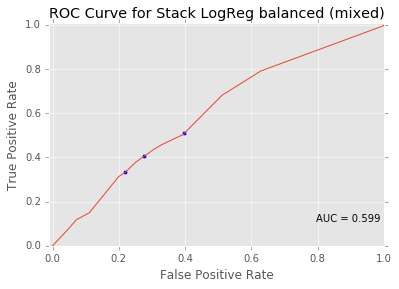

all   score: 0.697  baseline: 0.845   1-prec: 0.858   f1: 0.224  | test score 0.287  1-prec 0.867 f1 0.221  GP 525MM
2011  score: 0.760  baseline: 0.887   wscore: 0.892   f1: 0.169  | test score 0.809  1-prec 0.900
2012  score: 0.744  baseline: 0.867   wscore: 0.872   f1: 0.168  | test score 0.722  1-prec 0.873
2013  score: 0.684  baseline: 0.818   wscore: 0.841   f1: 0.288  | test score 0.726  1-prec 0.832


In [46]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack LogReg balanced (mixed)")

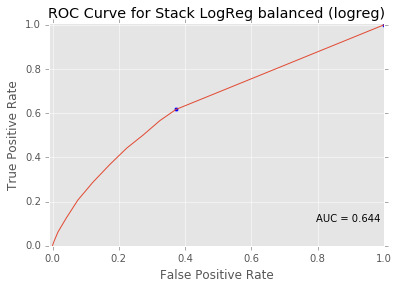

all   score: 0.659  baseline: 0.845   1-prec: 0.899   f1: 0.348  | test score 0.374  1-prec 0.902 f1 0.157  GP 261MM
2011  score: 0.722  baseline: 0.887   wscore: 0.902   f1: 0.222  | test score 0.735  1-prec 0.918
2012  score: 0.686  baseline: 0.867   wscore: 0.902   f1: 0.294  | test score 0.677  1-prec 0.894
2013  score: 0.609  baseline: 0.818   wscore: 0.889   f1: 0.379  | test score 0.638  1-prec 0.885


In [47]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack LogReg balanced (logreg)")

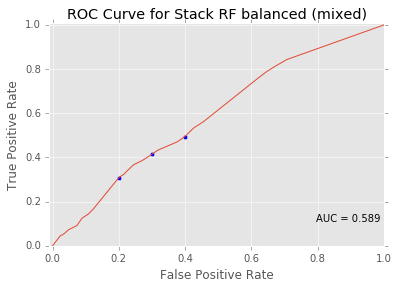

all   score: 0.729  baseline: 0.845   1-prec: 0.857   f1: 0.218  | test score 0.275  1-prec 0.866 f1 0.224  GP 532MM
2011  score: 0.775  baseline: 0.887   wscore: 0.890   f1: 0.150  | test score 0.811  1-prec 0.902
2012  score: 0.786  baseline: 0.867   wscore: 0.871   f1: 0.156  | test score 0.784  1-prec 0.868
2013  score: 0.687  baseline: 0.818   wscore: 0.837   f1: 0.272  | test score 0.739  1-prec 0.837


In [48]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack RF balanced (mixed)")

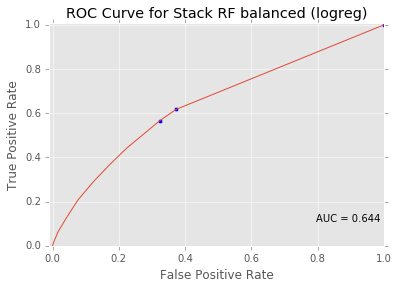

all   score: 0.653  baseline: 0.845   1-prec: 0.900   f1: 0.347  | test score 0.341  1-prec 0.897 f1 0.166  GP 327MM
2011  score: 0.722  baseline: 0.887   wscore: 0.902   f1: 0.222  | test score 0.735  1-prec 0.918
2012  score: 0.692  baseline: 0.867   wscore: 0.902   f1: 0.295  | test score 0.678  1-prec 0.894
2013  score: 0.631  baseline: 0.818   wscore: 0.887   f1: 0.384  | test score 0.602  1-prec 0.892


In [49]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack RF balanced (logreg)")

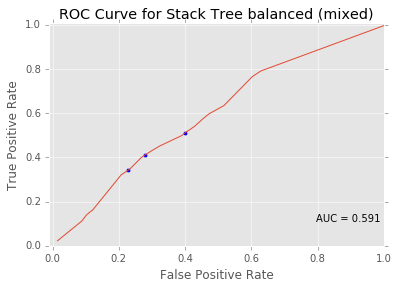

all   score: 0.706  baseline: 0.845   1-prec: 0.858   f1: 0.227  | test score 0.293  1-prec 0.868 f1 0.220  GP 515MM
2011  score: 0.773  baseline: 0.887   wscore: 0.892   f1: 0.165  | test score 0.803  1-prec 0.900
2012  score: 0.744  baseline: 0.867   wscore: 0.872   f1: 0.169  | test score 0.721  1-prec 0.873
2013  score: 0.685  baseline: 0.818   wscore: 0.842   f1: 0.291  | test score 0.727  1-prec 0.835


In [50]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack Tree balanced (mixed)")

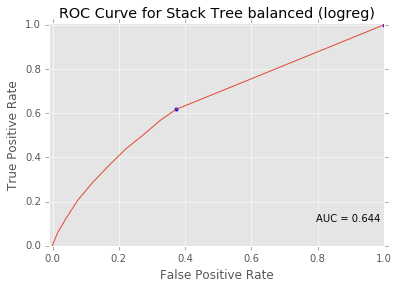

all   score: 0.659  baseline: 0.845   1-prec: 0.899   f1: 0.348  | test score 0.374  1-prec 0.902 f1 0.157  GP 261MM
2011  score: 0.722  baseline: 0.887   wscore: 0.902   f1: 0.222  | test score 0.735  1-prec 0.918
2012  score: 0.686  baseline: 0.867   wscore: 0.902   f1: 0.294  | test score 0.677  1-prec 0.894
2013  score: 0.601  baseline: 0.818   wscore: 0.889   f1: 0.377  | test score 0.638  1-prec 0.885


In [51]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack Tree balanced (logreg)")

#### Stacking Feature Importances

In [52]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 3,6.616011
Tree 2,2.879187
QDA,-0.852138
RF balanced,0.439006
Tree 1,0.212033
Log_Reg balanced,0.156637
LDA,-0.094727
Log_Reg,0.000000
RF,0.000000


In [53]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 3,0.674043
Tree 2,0.258156
Tree 1,0.021826
RF balanced,0.018867
LDA,0.014473
Log_Reg balanced,0.011475
QDA,0.001159
Log_Reg,0.000000
RF,0.000000


In [54]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 2,0.518919
Tree 3,0.462149
Tree 1,0.007515
LDA,0.005513
RF balanced,0.004620
Log_Reg balanced,0.000784
QDA,0.000500
Log_Reg,0.000000
RF,0.000000


## Visualizations

In [55]:
pd.DataFrame(model_performance).T

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
Always 1,0.000000,0.845479,0.000000,0.845479,0.845479,0.263391,0.848331,851.209909,0.151669
DTC,0.068802,0.845479,0.236518,0.857650,0.679041,0.232596,0.859927,501.152260,0.314260
DTC log2 balanced,0.542330,0.845479,0.284020,0.873987,0.597595,0.198181,0.872853,211.557174,0.448890
DTC sqrt balanced,0.242991,0.845479,0.260476,0.863490,0.633549,0.206394,0.872168,361.576681,0.375407
GBC,0.626263,0.845479,0.000000,0.845479,0.845479,0.263391,0.848331,851.209909,0.151669
GBC PCA,0.498121,0.860461,0.000000,0.860461,0.860461,0.248382,0.858198,217.168405,0.141802
GradientBoostingClassifier,0.509365,0.860461,0.000000,0.860461,0.860461,0.248382,0.858198,211.123874,0.141802
LogReg,0.668247,0.845479,0.032302,0.847161,0.844719,0.260011,0.850157,838.364110,0.152242
LogReg PCA,0.495639,0.860461,0.002027,0.860444,0.859606,0.248322,0.858218,216.897526,0.142339
LogReg PCA Balanced,0.499365,0.860461,0.216415,0.860094,0.508963,0.226042,0.855602,31.678909,0.494928


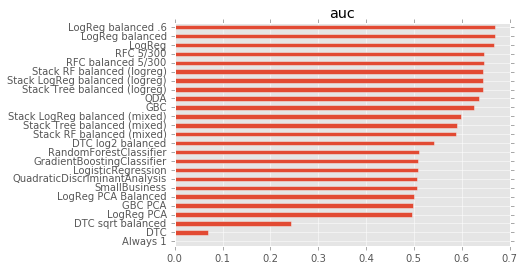

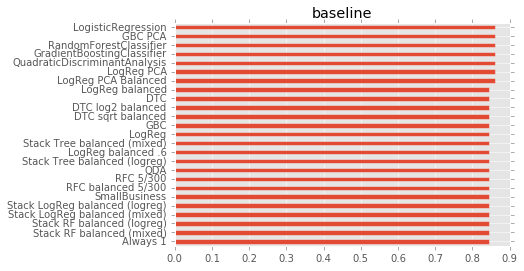

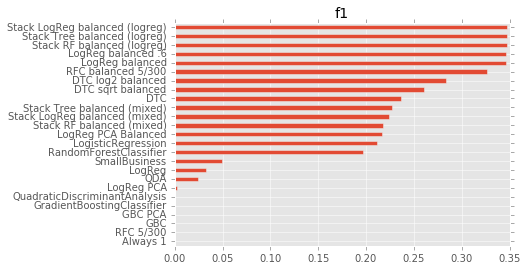

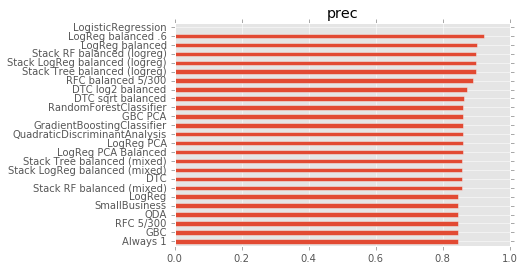

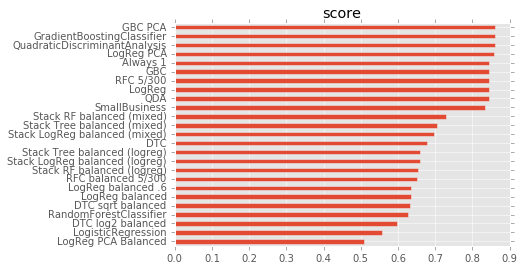

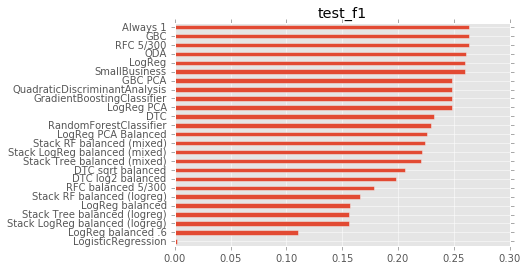

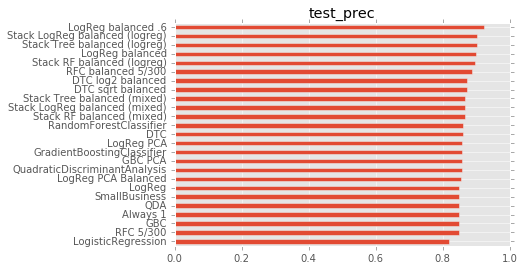

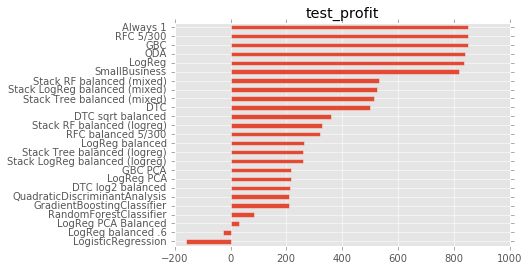

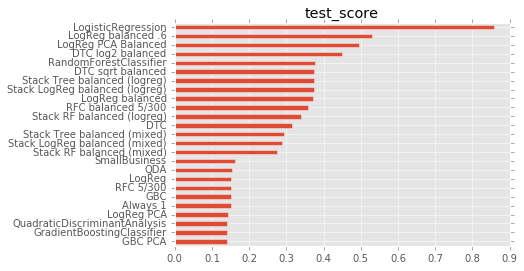

In [56]:
model_performance_df = pd.DataFrame(model_performance).T
for col in model_performance_df.columns:
    model_performance_df[col].sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()